In [56]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import yfinance as yf

In [58]:
dataset_train = yf.download('AAPL', start='2010-01-01', end='2020-01-01')
dataset_train.head()

# test = yf.download('AAPL', start='2020-01-02', end='2021-01-01')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454506,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465665,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362820,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351058,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393281,447610800


In [59]:
train = dataset_train.loc[:, ['Open']].values 
train.shape

(2516, 1)

In [60]:
# 特征处理
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
train_scaled = scaler.fit_transform(train)
train_scaled

array([[0.01141173],
       [0.01204572],
       [0.01192651],
       ...,
       [1.        ],
       [0.99370349],
       [0.99548624]])

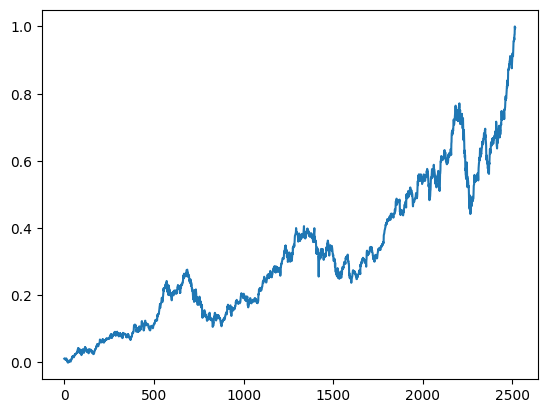

In [61]:
plt.plot(train_scaled)

In [62]:
# 准备模型训练
X_train = []
y_train = []
# 将使用之前的50个时间点的数据作为输入特征来预测下一个时间点的值
timesteps = 50

for i in range(timesteps, 2500):
    X_train.append(train_scaled[i - timesteps:i, 0]) # 取不到i
    y_train.append(train_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [63]:
X_train.shape

(2450, 50)

In [64]:
# reshape
# 样本数（samples）：数据集中的总样本数量。
# 时间步（timesteps）：每个样本中的序列长度或时间步长。
# 特征数（features）：每个时间步中的特征数量。

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(2450, 50, 1)

In [65]:
# RNN模型
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

#Initialize RNN:
model = Sequential()

#Adding the first RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True, input_shape= (X_train.shape[1],1)))
model.add(Dropout(0.2))

#Adding the second RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

#Adding the third RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

#Adding the fourth RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50))
model.add(Dropout(0.2))

#Adding the output layer
model.add(Dense(units = 1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 50, 50)            2600      
                                                                 
 dropout_4 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 dropout_5 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 dropout_6 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 50)               

In [52]:
# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
77/77 [==============================] - 3s 17ms/step - loss: 0.0350
Epoch 2/10
77/77 [==============================] - 1s 14ms/step - loss: 0.0154
Epoch 3/10
77/77 [==============================] - 1s 15ms/step - loss: 0.0091
Epoch 4/10
77/77 [==============================] - 1s 14ms/step - loss: 0.0067
Epoch 5/10
77/77 [==============================] - 1s 14ms/step - loss: 0.0049
Epoch 6/10
77/77 [==============================] - 1s 14ms/step - loss: 0.0041
Epoch 7/10
77/77 [==============================] - 1s 15ms/step - loss: 0.0034
Epoch 8/10
77/77 [==============================] - 1s 15ms/step - loss: 0.0027
Epoch 9/10
77/77 [==============================] - 1s 15ms/step - loss: 0.0027
Epoch 10/10
77/77 [==============================] - 1s 14ms/step - loss: 0.0023
